# Table of Contents 

- **Series**
- **DataFrame**
    - Accessing a DataFrame
    - Boolean Indexing
    - Adding columns
    - Deleting columns
    - Importing Excel files as DataFrames
    - Missing Data
    - Writing and reading CSV files

- **DataFrame Operations**
    - Matrix operations
    - Column operations

- **Data Splitting**
    - Grouping
    
- **Plotting with Pandas and Matplotlib: examples**
    


### The Data Mining Process 

Image from: 

    Usama M. Fayyad, Gregory Piatetsky-Shapiro, Padhraic Smyth, and Ramasamy Uthurusamy. 
    Advances in Knowledge Discovery and Data Mining.
    MIT Press, Menlo Park, CA, 1996

![datamining](images/DataMiningProcess.PNG)


**Pandas** is desgined to make **data pre-processing and data analysis fast and easy in Python**. Pandas adopts many coding idioms from NumPy, such as avoiding the `for` loops, but it is designed for working with heterogenous data represented in tabular format.

To use Pandas, you need to import the `pandas` module, using for example:

In [1]:
import pandas as pd
import numpy as np # we will also need numpy

This import style is quite standard; all objects and functions the `pandas` package will now be invoked with the `pd.` prefix.


NumPy (**Num**erical **Py**thon) is the fundamental package for scientific computing with Python. It contains, among other things:

- a powerful N-dimensional array object
- sophisticated functions that support broadcasting (i.e. it allows to perform arithmetic operations between arrays with different shape)
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

The core object of numpy is **ndarray**: N-dimensional Array. It represents a multidimensional, homogeneous array of fixed-size items.

In [2]:
# example of 1-dimensional array
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [3]:
# example of 2-dimensional array
my_ndarray = np.zeros((3,5))
my_ndarray

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
print(my_ndarray)
print(my_ndarray.shape)
print(my_ndarray.ndim)
print(my_ndarray.size)
print(my_ndarray.dtype)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(3, 5)
2
15
float64



<font color='blue'>Pandas has two main data structures, **Series** and **DataFrame**.</font>


# Series

Series are the Pandas version of 1-D Numpy arrays. 

An instance of Series is a single dimension array-like object containing:
- a *sequence of values*,
- an array of *data labels*, called its **index**.

A Series can be created easily from a Python list:

In [5]:
ts = pd.Series([4, 8, 1, 3])
print(ts)

0    4
1    8
2    1
3    3
dtype: int64


The string representation of a Series display two columns: the first column represents the index array, the second column represents the values array. Since no index was specified, the default indexing consists of increasing integers starting from 0. 

The underlying structure can be recovered with the `values` attribute:

In [6]:
print(ts.values)
print(type(ts.values))

[4 8 1 3]
<class 'numpy.ndarray'>


To create a Series with its own index, you can write:

In [7]:
ts = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
print(ts)

first     4
second    8
third     1
fourth    3
dtype: int64


The labels in the index can be used to select values in the Series:

In [8]:
print(ts['first'])


4


In [9]:
print(ts[['second', 'fourth']])

second    8
fourth    3
dtype: int64


You can think about a Series as a kind of fixed-length, ordered Python's `dict`, mapping index values to data values. In fact, it is possible to create a Series directlty from a Python's `dict`:

In [10]:
my_dict = {'Pisa': 80, 'London': 300, 'Paris': 1}
ts = pd.Series(my_dict)
print(ts)

Pisa       80
London    300
Paris       1
dtype: int64


**Arithmetic operations** on Series are automatically aligned on the index labels:

In [11]:
ts1 = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
ts2 = pd.Series([4, 8, 1], index=['first', 'second', 'pisa'])

In [12]:
ts1

first     4
second    8
third     1
fourth    3
dtype: int64

In [13]:
ts2

first     4
second    8
pisa      1
dtype: int64

In [14]:
ts_sum = ts1 + ts2
print(ts_sum)

first      8.0
fourth     NaN
pisa       NaN
second    16.0
third      NaN
dtype: float64


Here two index values are correctly computed (corresponding to the label `first` and `second`). The two other index labels `third` and `fourth` in `ts1` are missing in `ts2`, as well as the `pisa` index label in `ts2`. Hence, for each of these index label, a `NaN` value (*not a number*) appears, which Pandas considers as a **missing value**.

The `pd.isnull` (or `pd.isna`) and `pd.notnull` (or `pd.notna`) functions detects missing data. There are also corresponding **instance methods**.

In [15]:
print(pd.isnull(ts_sum))
print()
print(ts_sum.isnull())

first     False
fourth     True
pisa       True
second    False
third      True
dtype: bool

first     False
fourth     True
pisa       True
second    False
third      True
dtype: bool


In [16]:
print(pd.notnull(ts_sum))
print()
print(ts_sum.notnull())

first      True
fourth    False
pisa      False
second     True
third     False
dtype: bool

first      True
fourth    False
pisa      False
second     True
third     False
dtype: bool


# DataFrame

A DataFrame is a **rectangular table of data**. It contains an ordered list of columns. Every column can be of a different type. 

A DataFrame has both a *row index* and a *column index*. It can be thought as a *dictionary of Series* (one per column) all sharing the same index labels.

There are many way to construct a DataFrame, but the most common is using a dictionary of Python's lists (or NumPy's arrays):

In [17]:
cars = {'Brand': ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
        'Price': [22000, 25000, 27000, 35000],
        'Wheels': 4} # broadcast if possible

df = pd.DataFrame(cars)
print(df)

            Brand  Price  Wheels
0     Honda Civic  22000       4
1  Toyota Corolla  25000       4
2      Ford Focus  27000       4
3         Audi A4  35000       4


The resulting DataFrame will receive its index automatically as with Series.

To pretty-print a DataFrame in a Jupyter notebooks, it is enough to write its name (or using the `head()` instance method for very long DataFrames):

In [18]:
df

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4
2,Ford Focus,27000,4
3,Audi A4,35000,4


In [19]:
df.head(2)

,Brand,Price,Wheels
0,Honda Civic,22000,4
1,Toyota Corolla,25000,4


In [20]:
df.tail(2)

,Brand,Price,Wheels
2,Ford Focus,27000,4
3,Audi A4,35000,4


A summary of the *numerical* data is provided by `describe`:

In [21]:
df.describe()

,Price,Wheels
count,4.000000,4.0
mean,27250.000000,4.0
std,5560.275773,0.0
min,22000.000000,4.0
25%,24250.000000,4.0
50%,26000.000000,4.0
75%,29000.000000,4.0
max,35000.000000,4.0


If working with a large table, it might be useful to sometimes have a list of all the columns' names. This is given by the `keys()` methods:

In [22]:
print(df.keys())

Index(['Brand', 'Price', 'Wheels'], dtype='object')


In [23]:
print(df.columns)

Index(['Brand', 'Price', 'Wheels'], dtype='object')


Many feature from the NumPy package can be directly used with Pandas DataFrames

In [24]:
print(df.values)
print()
print(type(df.values))

[['Honda Civic' 22000 4]
 ['Toyota Corolla' 25000 4]
 ['Ford Focus' 27000 4]
 ['Audi A4' 35000 4]]

<class 'numpy.ndarray'>


In [25]:
print(df.shape)

(4, 3)


Another common way to create a DataFrame is to use a *nested dict of dicts*:

In [26]:
population = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If this nested dict is passed to the DataFrame, the **outer dict keys are interpreted as column labels**, and the **inner keys are interpreted as row labels**:

In [27]:
df = pd.DataFrame(population)
df

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


## Accessing a DataFrame

Let's create a brand new DataFrame:

In [28]:
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 
                'death':[1911, 1827, 1924, 1975], 
                'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}
composers_df = pd.DataFrame(dict_of_list, index=['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


There are multiple ways of accessing values or series of values in a Dataframe. Unlike in Series, a simple bracket gives access to a column and not an index, for example:

In [29]:
composers_df['city']

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

returns a Series. Alternatively one can also use the attributes syntax and access columns by using:

In [30]:
composers_df.city

Mahler                   Kaliste
Beethoven                   Bonn
Puccini                  Lucques
Shostakovich    Saint-Petersburg
Name: city, dtype: object

The attributes syntax has some limitations, so in case something does not work as expected, revert to the brackets notation.

When specifiying multiple columns, a DataFrame is returned:

In [31]:
composers_df[['city', 'birth']]

,city,birth
Mahler,Kaliste,1860
Beethoven,Bonn,1770
Puccini,Lucques,1858
Shostakovich,Saint-Petersburg,1906


from the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html):
>The Python and NumPy indexing operators [$\cdot$] and attribute operator  `.` provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the **optimized pandas data access methods**.



Standard indexing operators (just slices the rows)

In [32]:
composers_df[0:2]

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn


Pandas optimized data access methods:  `iloc` and `loc`.

**Remember that `loc` and `iloc` are attributes, not methods, hence they use brackets `[]` and not parenthesis `()`.**

The `loc` attribute allows to recover elements by using the index labels, while the `iloc` attribute can be used to recover the regular indexing:

In [33]:
print(composers_df.iloc[0:2,:])
print()
print(composers_df.loc[['Mahler','Beethoven'], 'death'])
print()
print(composers_df.loc['Beethoven', 'death'])

           birth  death     city
Mahler      1860   1911  Kaliste
Beethoven   1770   1827     Bonn

Mahler       1911
Beethoven    1827
Name: death, dtype: int64

1827


## Boolean Indexing

Just like with Numpy, it is possible to subselect parts of a Dataframe using boolean indexing.
A logical Series can be used as an index to select elements in the Dataframe.

In [34]:
composers_df

,birth,death,city
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


In [35]:
mask = composers_df['death'] > 1859
print(mask)
composers_df[mask]

Mahler           True
Beethoven       False
Puccini          True
Shostakovich     True
Name: death, dtype: bool


,birth,death,city
Mahler,1860,1911,Kaliste
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


More compact:

In [36]:
composers_df[composers_df['birth'] > 1900]

,birth,death,city
Shostakovich,1906,1975,Saint-Petersburg


## Adding columns

It is very simple to add a column to a Dataframe:

In [37]:
composers_df['country'] = '???'
composers_df

,birth,death,city,country
Mahler,1860,1911,Kaliste,???
Beethoven,1770,1827,Bonn,???
Puccini,1858,1924,Lucques,???
Shostakovich,1906,1975,Saint-Petersburg,???


Alternatively, an existing list can be used:

In [38]:
composers_df['country2'] = ['Austria','Germany','Italy','Russia']
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Puccini,1858,1924,Lucques,???,Italy
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


## Deleting columns and rows

In [39]:
composers_df

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Puccini,1858,1924,Lucques,???,Italy
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


In [40]:
composers_df.drop(columns = ['country2'])

,birth,death,city,country
Mahler,1860,1911,Kaliste,???
Beethoven,1770,1827,Bonn,???
Puccini,1858,1924,Lucques,???
Shostakovich,1906,1975,Saint-Petersburg,???


In [41]:
composers_df.drop('Puccini')

,birth,death,city,country,country2
Mahler,1860,1911,Kaliste,???,Austria
Beethoven,1770,1827,Bonn,???,Germany
Shostakovich,1906,1975,Saint-Petersburg,???,Russia


## Importing Excel files as DataFrames

Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel. You may need to also install `xlrd` package:

In [42]:
# !pip install xlrd
# !conda install openpyxl

An Excel table is provided in the [composers.xlsx](data/composers.xlsx) file and can be read with the `pd.read_excel` function.

In [43]:
composers_df = pd.read_excel('data/composers.xlsx')
composers_df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [44]:
pd.read_excel?

In [45]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg


If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [46]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2')
composers_df

,birth,death,city
composer,,,
Mahler,1860,1911,Kaliste
Beethoven,1770,1827,Bonn
Puccini,1858,1924,Lucques
Shostakovich,1906,1975,Saint-Petersburg
Sibelius,unknown,unknown,unknown
Haydn,NaN,NaN,Rohrau


As you can see above, some information is missing. Some missing values are marked as "`unknown`" while other are `NaN`. `NaN` is the standard symbol for unknown/missing values and is understood by Pandas while "`unknown`" is just seen as text. 
This is impractical as now we have columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard `NaN` symbol that says "*no information*".
For this we can use the `na_values` argument to specify what should be a `NaN`:

In [47]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2', 
                             na_values=['unknown'])
composers_df

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


## Missing data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [48]:
df_new = composers_df.copy()

In [49]:
df_new

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


Get a boolean mask where values are `np.nan` (as for Series).

In [50]:
pd.isna(df_new)

,birth,death,city
composer,,,
Mahler,False,False,False
Beethoven,False,False,False
Puccini,False,False,False
Shostakovich,False,False,False
Sibelius,True,True,True
Haydn,True,True,False


In [51]:
df_new.isna().values.any()

True

In [52]:
df_new.isna().sum()

birth    2
death    2
city     1
dtype: int64

To drop missing data.

In [53]:
df_new.dropna(how='any') # delete any row and column with at least one np.nan

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg


In [54]:
df_new.dropna(how = 'all') # the whole row (or column) must be np.nan 

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Haydn,NaN,NaN,Rohrau


Filling missing data

In [55]:
df_new.fillna(value=5)

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,5.0,5.0,5
Haydn,5.0,5.0,Rohrau


## Writing and reading - CSV files


In [56]:
df_new.to_csv('data/foo.csv')

In [57]:
df_read = pd.read_csv('data/foo.csv')
df_read

,composer,birth,death,city
0,Mahler,1860.0,1911.0,Kaliste
1,Beethoven,1770.0,1827.0,Bonn
2,Puccini,1858.0,1924.0,Lucques
3,Shostakovich,1906.0,1975.0,Saint-Petersburg
4,Sibelius,NaN,NaN,NaN
5,Haydn,NaN,NaN,Rohrau


In [58]:
df_read = pd.read_csv('data/foo.csv',index_col = 'composer')
df_read

,birth,death,city
composer,,,
Mahler,1860.0,1911.0,Kaliste
Beethoven,1770.0,1827.0,Bonn
Puccini,1858.0,1924.0,Lucques
Shostakovich,1906.0,1975.0,Saint-Petersburg
Sibelius,NaN,NaN,NaN
Haydn,NaN,NaN,Rohrau


# DataFrame Operations

One of the great advantages of using Pandas to handle tabular data is how simple it is to extract valuable information from them. Here we are going to see various types of operations that are available for this.

## Matrix operations

The strength of Numpy is its natural way of handling matrix operations, and Pandas reuses a lot of these features. For example one can use simple mathematical operations to opereate at the cell level:

In [59]:
df = pd.read_excel('data/composers.xlsx')
df

,composer,birth,death,city
0,Mahler,1860,1911,Kaliste
1,Beethoven,1770,1827,Bonn
2,Puccini,1858,1924,Lucques
3,Shostakovich,1906,1975,Saint-Petersburg


In [60]:
df['birth'] * 2

0    3720
1    3540
2    3716
3    3812
Name: birth, dtype: int64

In [61]:
np.log(df['birth'])

0    7.528332
1    7.478735
2    7.527256
3    7.552762
Name: birth, dtype: float64

We can directly use an operation's output to create a new column:

In [62]:
df['age'] = df['death'] - df['birth']
df

,composer,birth,death,city,age
0,Mahler,1860,1911,Kaliste,51
1,Beethoven,1770,1827,Bonn,57
2,Puccini,1858,1924,Lucques,66
3,Shostakovich,1906,1975,Saint-Petersburg,69


Here we applied functions only to series. Indeed, since our Dataframe contains e.g. strings, no operation can be done on it. If however we have a homogenous Dataframe, this is possible:

In [63]:
df[['birth', 'death']] * 2

,birth,death
0,3720,3822
1,3540,3654
2,3716,3848
3,3812,3950


## Column operations

There are other types of functions whose purpose is to summarize the data. For example the mean or standard deviation. Pandas by default applies such functions column-wise and returns a series containing e.g. the mean of each column:

In [64]:
np.mean(df[['birth','death','age']])

birth    1848.50
death    1909.25
age        60.75
dtype: float64

Sometimes one needs to apply to a column a very specific function that is not provided by default. In that case we can use one of the different `apply` methods of Pandas.

The simplest case is to apply a function to a column, or Series of a DataFrame. Let's say for example that we want to define the age >60 as 'old' and <60 as 'young'. We can define the following general function:

In [65]:
define_age = lambda x: 'old' if x > 60 else 'young'

We can now apply this function on an entire Series:

In [66]:
df['categorical age'] = df.age.apply(define_age)

In [67]:
df

,composer,birth,death,city,age,categorical age
0,Mahler,1860,1911,Kaliste,51,young
1,Beethoven,1770,1827,Bonn,57,young
2,Puccini,1858,1924,Lucques,66,old
3,Shostakovich,1906,1975,Saint-Petersburg,69,old


We can also apply a function to an entire DataFrame. For example we can ask how many composers have birth and death dates within the XIXth century:

In [68]:
df[['birth','death']].apply(lambda x: np.sum((x >= 1800) & (x < 1900)))

birth    2
death    1
dtype: int64

### Histogramming

In [69]:
df['categorical age'].value_counts()

young    2
old      2
Name: categorical age, dtype: int64

# Data Splitting

Often Pandas tables mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data using the category to do computations. Pandas allows to do this very easily.

## Grouping

In [70]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet5')

In [71]:
composers_df

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy
Dvorak,1841,1904.0,romantic,Czechia
Schumann,1810,1856.0,romantic,Germany
Stravinsky,1882,1971.0,modern,Russia
Sibelius,1865,1957.0,post-romantic,Finland


In [72]:
composers_df.head()

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy


What if we want now to count how many composers we have in each category? 

Pandas simplifies this with the `groupby()` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [73]:
composer_grouped = composers_df.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called *group* which has a lot of handy properties. First let's see what the groups actually are. As for the Dataframe, let's look at a summary of the object:

In [74]:
composer_grouped.describe()

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death                                                   \
                  max count         mean        std     min      25%     50%   
period                                                                         
baroque        1710.0  10.0  1720.200000  43.460838  1640.0  1697.25  1736.0   
classic        1756.0   5.0  1801.200000   6.942622  1791.0  1799.00  1801.0   
modern         1971.0  11.0  1974.090909  26.139834  1928.0  1962.00  1982.0   
post-romantic  1865.0   5.0  1927.400000  25.540164  1896.0  1911.00  1924.0   
renaissance    1567.0   7.0  1595.285714  56.295986  1474.0  1594.00  1613.0   
romantic       1867.0  17.0  1883.588235  28.026904  1827.0  1869.00  1887.0   

                                
                   75%     max  
period                          
baroque        1755.25  1764.0  
classic        1806.00  1809.0  
modern         1990.00  2016.0  
post-romantic  1949.00  1957.0  
renaissance    1624.50  1643.0  
romantic       1904.00  1919.0

So we have a dataframe with a statistical summary of the the contents. The "names" of the groups are here the indices of the Dataframe. These names are simply all the different categories that were present in the column we used for grouping. Now we can recover a single group:

In [75]:
composer_grouped.get_group('baroque')

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Purcell,1659,1695.0,baroque,England
Charpentier,1643,1704.0,baroque,France
Couperin,1626,1661.0,baroque,France
Rameau,1683,1764.0,baroque,France
Caldara,1670,1736.0,baroque,Italy
Pergolesi,1710,1736.0,baroque,Italy
Scarlatti,1685,1757.0,baroque,Italy
Caccini,1587,1640.0,baroque,Italy


If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the `groupby()` function:


In [76]:
composer_grouped = composers_df.groupby(['period','country'])
composer_grouped.get_group(('baroque','Germany'))

,birth,death,period,country
composer,,,,
Haendel,1685,1759.0,baroque,Germany
Bach,1685,1750.0,baroque,Germany


The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on output).
For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us.

## Plotting DataFrames

Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. 

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

In [78]:
conda install matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Alessandro\anaconda3\envs\aide

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       ha925a31_2         332 KB
    cycler-0.10.0              |   py39haa95532_0          16 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    kiwisolver-1.3.1           |   py39hd77b12b_0          52 KB
    libtiff-4.2.0              |       hd0e1b90_0         786 KB
    libwebp-1.2.0              |       h2bbff1b_0         643 KB
    lz4-c-1.9.3                |       h2bbff1b_1         132 KB
    matplotlib-3.4.3           |   py39haa95532_0          29 KB
    matplotlib-base-3.4.3      |   py39h49ac443_0         5.5 MB
    munkres-1.1.4              |             py_0          13 KB
    olefile-0.46               |    

In [80]:
import matplotlib.pyplot as plt

In [81]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet5')
composers_df

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy
Dvorak,1841,1904.0,romantic,Czechia
Schumann,1810,1856.0,romantic,Germany
Stravinsky,1882,1971.0,modern,Russia
Sibelius,1865,1957.0,post-romantic,Finland


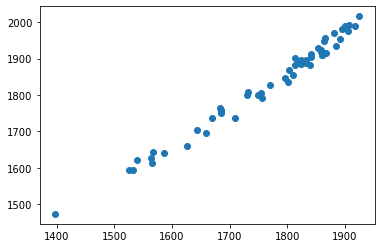

In [82]:
plt.plot(composers_df.birth, composers_df.death, 'o')
plt.show()

Different types of plots are accessible when using the `plot` function of DataFrame instances via the `kind` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

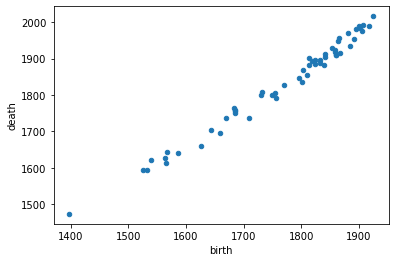

In [83]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter')
plt.show()

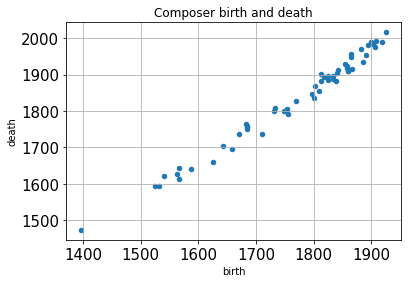

In [84]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter',
                  title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

Some additional plotting options are available in the plot() module. For example histograms:

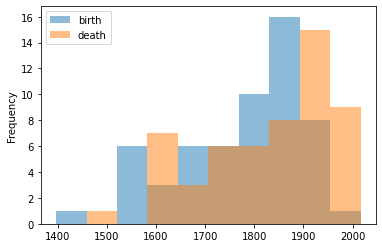

In [85]:
composers_df.plot.hist(alpha = 0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

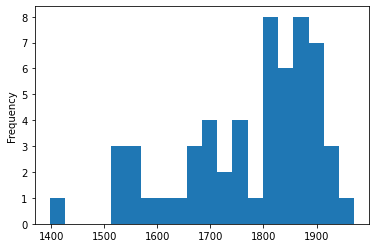

In [86]:
composers_df['birth'].plot.hist(bins = 20)
plt.show()

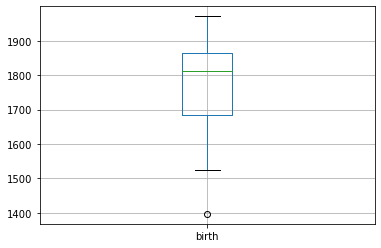

In [87]:
composers_df.boxplot(column = 'birth')
plt.show()

# Matplotlib

recommended reading: 
- [Sample plots in Matplotlib](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html)

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:
* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* The figure can be controlled programmatically.

In [88]:
t = np.arange(0,10,0.1)
sin_t = np.sin(2*np.pi*t/5)
cos_t = np.cos(2*np.pi*t/5)


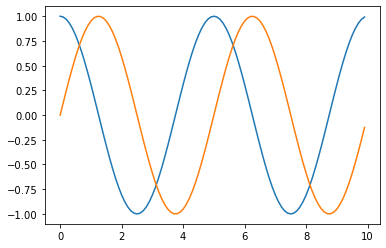

In [91]:
plt.plot(t,cos_t)
plt.plot(t,sin_t)

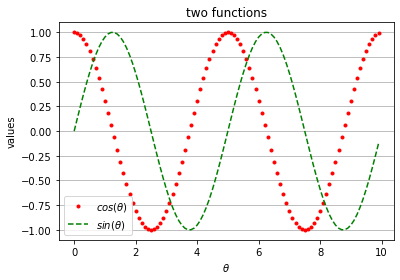

In [92]:
plt.plot(t,cos_t,'.r', label = r"$cos(\theta)$")
plt.plot(t,sin_t,'--g', label = r"$sin(\theta)$")
plt.title('two functions')
plt.xlabel(r"$\theta$")
plt.ylabel('values')
plt.ylim([-1.1,1.1])
plt.legend()
plt.grid(axis = 'y')

# plt.legend(loc=0) # let matplotlib decide the optimal location
# plt.legend(loc=1) # upper right corner
# plt.legend(loc=2) # upper left corner
# plt.legend(loc=3) # lower left corner
# plt.legend(loc=4) # lower right corner
# # .. many more options are available

plt.savefig('img/example_figure.png', format = 'png')
plt.show()

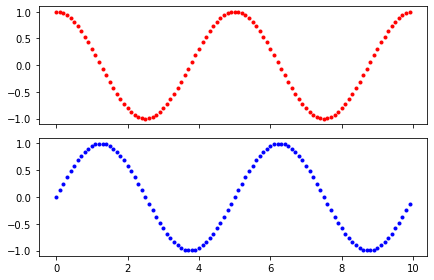

In [93]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t,cos_t,'.r')
axarr[1].plot(t,sin_t,'.b')
plt.tight_layout()
plt.show()

In [94]:
x = np.linspace(0, 5, 11)

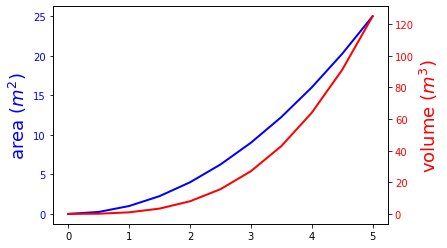

In [95]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

plt.show()

In [96]:
# allow to use matplotlib interactively and set the desired backend
%matplotlib inline
# %matplotlib notebook
# %matplotlib --list

## Magic functions

[IPython's 'magic' functions](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

- The magic function system provides a series of **functions which allow you to
control the behavior of IPython itself**, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented
- **Line magics are prefixed with the % character** and work much like OS
command-line calls. They get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.
- **Cell magics are prefixed with %% (a double % character)**, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument. These magics are called with two arguments: the rest of the call line and the body of the cell, consisting of the lines below the first.

In [97]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [98]:
%whos dict ndarray

Variable       Type       Data/Info
-----------------------------------
axarr          ndarray    2: 2 elems, type `object`, 16 bytes
cars           dict       n=3
cos_t          ndarray    100: 100 elems, type `float64`, 800 bytes
dict_of_list   dict       n=3
my_dict        dict       n=3
my_ndarray     ndarray    3x5: 15 elems, type `float64`, 120 bytes
population     dict       n=2
sin_t          ndarray    100: 100 elems, type `float64`, 800 bytes
t              ndarray    100: 100 elems, type `float64`, 800 bytes
x              ndarray    11: 11 elems, type `float64`, 88 bytes


In [99]:
%timeit np.zeros((100,100))+5

5.46 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [100]:
%%timeit 

np.zeros((100,100))+5
np.zeros((100,100))+5

10.6 µs ± 274 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
